In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import cauchy

In [8]:
np.angle(1j)

1.5707963267948966

In [2]:
N = 3200
omega = cauchy.rvs(loc=0,scale=1,size=N)
theta = np.random.uniform(-np.pi,np.pi,size=N)
Aij = np.ones((N,N)) - np.eye(N)
K = 3

In [5]:

def KURAMOTO(theta,t):
    i,j = np.meshgrid(theta,theta)
    inter = Aij*np.sin(j-i)
    theta = omega + K*inter.sum(axis=0)/N
    return theta
# theta__ = omega + K*inter.sum(axis=0)/N


def KURAMOTO_ivp(t,theta):
    i,j = np.meshgrid(theta,theta)
    inter = Aij*np.sin(j-i)
    theta = omega + K*inter.sum(axis=0)/N
    return theta

def KURAMOTO_mean(theta,t):
    rpsi = 1/N * np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    dtheta = omega + K*r*np.sin(psi-theta)
    return dtheta

def KURAMOTO_mean_ivp(t,theta):
    rpsi = 1/N * np.sum(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    dtheta = omega + K*r*np.sin(psi-theta)
    return dtheta
# theta__ = omega + K*inter.sum(axis=0)/N

# inter

In [6]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2., *args)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2., *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [13]:
t = np.arange(0,1000,0.01,dtype=np.float64)

In [8]:
%load_ext memory_profiler
%load_ext line_profiler

In [9]:
len(t)

10000

In [10]:
16*60 + 28

988

In [14]:
%timeit RK4(KURAMOTO_mean,theta,t)

In [16]:
%memit RK4(KURAMOTO_mean,theta,t)

UsageError: Line magic function `%memit` not found.


In [42]:
temp  =  np.random.rand(25600)
%timeit  temp  -  3.0

9.86 µs ± 80.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [16]:
type(t)

numpy.ndarray

In [ ]:
sol = RK4(KURAMOTO_mean,theta,t)
sol2 = RK4(KURAMOTO,theta,t)

In [22]:
from scipy.integrate import solve_ivp

In [ ]:
sol = solve_ivp(KURAMOTO_ivp,(0,10),theta,dense_output=True)

In [24]:
%timeit sol = solve_ivp(KURAMOTO_mean_ivp,(0,10),theta,method="RK45",dense_output=True); sol.sol(t)

109 ms ± 710 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
sol

array([[   0.94092385,    1.00596599,    0.47056459, ...,   -1.98142281,
          -1.4464842 ,    2.44158249],
       [   0.87561016,    1.01607525,    0.49643106, ...,   -1.72471434,
          -1.4463782 ,    2.25544761],
       [   0.810321  ,    1.02617893,    0.52232364, ...,   -1.46786348,
          -1.44623171,    2.06934144],
       ...,
       [ -63.45153959,    9.37096689,   23.04415588, ...,  254.10022075,
          -3.75532892, -182.52748479],
       [ -63.51829502,    9.37169649,   23.05213944, ...,  254.35123346,
          -3.75477393, -182.71016062],
       [ -63.58616111,    9.37240249,   23.06020066, ...,  254.5983956 ,
          -3.75428115, -182.89597682]])

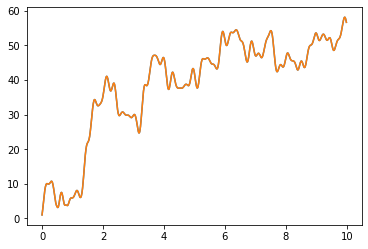

In [164]:
plt.plot(t,abs((np.exp(sol*1j)).sum(axis=1)))
plt.plot(t,abs((np.exp(sol2*1j)).sum(axis=1)))

# Array minus Array

In [14]:

N = [100,200,400,800,1600,3200,6400,12800,25600]
for x in N:
    temp = np.random.rand(x)
    temp2  = 3*np.ones(x)
    print(f"Now N is {x}")
    %timeit temp - temp2

Now N is 100
319 ns ± 0.465 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Now N is 200
391 ns ± 10.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Now N is 400
415 ns ± 3.21 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Now N is 800
571 ns ± 0.711 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Now N is 1600
873 ns ± 4.56 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Now N is 3200
1.27 µs ± 8.96 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
Now N is 6400
2.33 µs ± 37 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Now N is 12800
4.69 µs ± 131 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Now N is 25600
10.9 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [49]:
N = [100,200,400,800,1600,3200,6400]
for x in N:
    temp = np.random.rand(x,x)
    temp2  = 3*np.ones((x,x))
    print(f"Now N is {x}")
    %timeit temp*3

Now N is 100
2.84 µs ± 38.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Now N is 200
12.8 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Now N is 400
336 µs ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Now N is 800
1.43 ms ± 85.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Now N is 1600
6.26 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Now N is 3200
25.5 ms ± 4.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Now N is 6400
97.7 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
temp = np.array([[1 ,2,3],[4,5,6],[7,8,9]])
temp2 = np.array([[0 ,1,1],[1,0,1],[0,1,1]])


In [15]:
temp2*temp

array([[0, 2, 3],
       [4, 0, 6],
       [0, 8, 9]])

In [16]:
(temp*temp2).shape

SyntaxError: invalid syntax (903970458.py, line 1)

# Benchmark Graph

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
N = [100,200,400,800,1600,3200]
python_bc = [0.522,1.76,12.5,49.3,193,810]
Julia_bc = [0.363,1.612,7.635,33.402,173.685,640.305]

N_mf = [100,200,400,800,1600,3200,6400,12800]
python_bc_mf = [90.2,114,164,253,449,834,1560,3130]
Julia_bc_mf = [28.772,45.35,81.71,168.39,417.38,998.85,1789,3865]

N_as = [100,200,400,800,1600,3200,6400,12800,25600]
python_as = [0.718,0.806,0.842,1.01,1.18,1.65,2.14,3.86,8.51]
Julia_as = [0.066,0.124,0.284,0.469,0.874,1.978,3.95,8.40,15.40]

N_mm = [100,200,400,800,1600,3200,6400]
python_mm = [0.0035,0.016,0.362,1.71,7.18,30.3,122]
Julia_mm = [0.0066,0.0258,0.206,0.932,4.965,21.965,92.074]

N_m_m = [100,200,400,800,1600,3200,6400]
python_m_m = [0.124,0.216,1.09,5.78,42.2,296,2160]
Julia_m_m = [0.053,0.113,0.629,3.523,37.017,274.214,2134]

In [22]:
len(Julia_as)

9

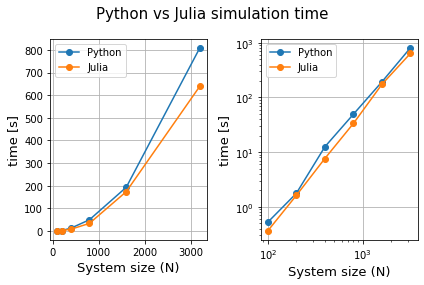

In [68]:
plt.subplot(121)
plt.plot(N, python_bc,'-o',label ="Python")
plt.plot(N,Julia_bc,'-o',label='Julia')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel("System size (N)",fontsize=13)
plt.ylabel("time [s]",fontsize=13)

plt.subplot(122)
plt.plot(N, python_bc,'-o',label ="Python")
plt.plot(N,Julia_bc,'-o',label='Julia')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel("System size (N)",fontsize=13)
plt.ylabel("time [s]",fontsize=13)

plt.suptitle("Python vs Julia simulation time",fontsize=15)
plt.tight_layout()

plt.savefig("Python vs Julia Benchmark/simulatintime.png")


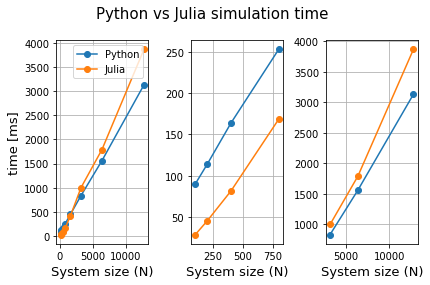

In [9]:
plt.subplot(131)
plt.plot(N_mf, python_bc_mf,'-o',label ="Python")
plt.plot(N_mf,Julia_bc_mf,'-o',label='Julia')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel("System size (N)",fontsize=13)
plt.ylabel("time [ms]",fontsize=13)

plt.subplot(132)
plt.plot(N_mf[:4], python_bc_mf[:4],'-o',label ="Python")
plt.plot(N_mf[:4],Julia_bc_mf[:4],'-o',label='Julia')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
# plt.legend()
plt.xlabel("System size (N)",fontsize=13)
# plt.ylabel("time [ms]",fontsize=13)

plt.subplot(133)
plt.plot(N_mf[5:], python_bc_mf[5:],'-o',label ="Python")
plt.plot(N_mf[5:],Julia_bc_mf[5:],'-o',label='Julia')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
# plt.legend()
plt.xlabel("System size (N)",fontsize=13)
# plt.ylabel("time [ms]",fontsize=13)


plt.suptitle("Python vs Julia simulation time",fontsize=15)
plt.tight_layout()

plt.savefig("Python vs Julia Benchmark/simulation time_mf.png",dpi=400)


In [77]:
print(*temp)

a b


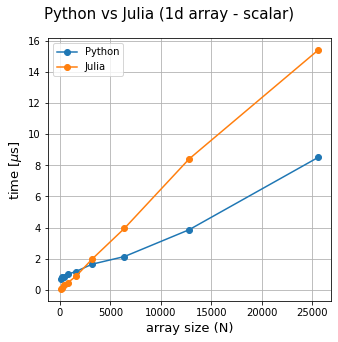

In [40]:
plt.figure(figsize=(4.8,4.8))
# plt.subplot(121)
plt.plot(N_as, python_as,'-o',label ="Python")
plt.plot(N_as,Julia_as,'-o',label='Julia')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel("array size (N)",fontsize=13)
plt.ylabel("time [$\mu$s]",fontsize=13)

# plt.subplot(122)
# plt.plot(N_as[:4], python_as[:4],'-o',label ="Python")
# plt.plot(N_as[:4],Julia_as[:4],'-o',label='Julia')
# # plt.xscale('log')
# # plt.yscale('log')
# plt.grid()
# plt.legend()
# plt.xlabel("array size (N)",fontsize=13)
# plt.ylabel("time [ms]",fontsize=13)

plt.suptitle("Python vs Julia (1d array - scalar)",fontsize=15)
plt.tight_layout()

plt.savefig("Python vs Julia Benchmark/simulation 1d array - scalar.png",dpi=400)


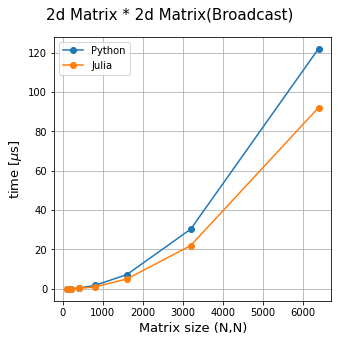

In [39]:
plt.figure(figsize=(4.8,4.8))
# plt.subplot(121)
plt.plot(N_mm, python_mm,'-o',label ="Python")
plt.plot(N_mm,Julia_mm,'-o',label='Julia')
# plt.xscale('log')
# plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel("Matrix size (N,N)",fontsize=13)
plt.ylabel("time [$\mu$s]",fontsize=13)

# plt.subplot(122)
# plt.plot(N_as[:4], python_as[:4],'-o',label ="Python")
# plt.plot(N_as[:4],Julia_as[:4],'-o',label='Julia')
# # plt.xscale('log')
# # plt.yscale('log')
# plt.grid()
# plt.legend()
# plt.xlabel("array size (N)",fontsize=13)
# plt.ylabel("time [ms]",fontsize=13)

plt.suptitle("2d Matrix * 2d Matrix(Broadcast)",fontsize=15)
plt.tight_layout()

plt.savefig("Python vs Julia Benchmark/simulation 2d Matrix x 2d Matrix.png",dpi=400)


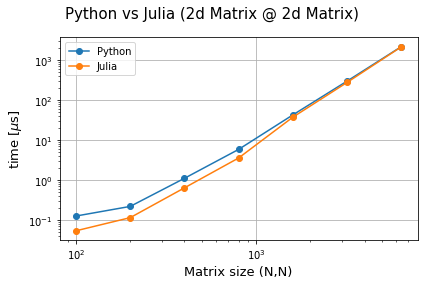

In [35]:
plt.figure(figsize=(10,10))
# plt.subplot(121)
plt.plot(N_m_m, python_m_m,'-o',label ="Python")
plt.plot(N_m_m,Julia_m_m,'-o',label='Julia')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend()
plt.xlabel("Matrix size (N,N)",fontsize=13)
plt.ylabel("time [$\mu$s]",fontsize=13)

# plt.subplot(122)
# plt.plot(N_as[:4], python_as[:4],'-o',label ="Python")
# plt.plot(N_as[:4],Julia_as[:4],'-o',label='Julia')
# # plt.xscale('log')
# # plt.yscale('log')
# plt.grid()
# plt.legend()
# plt.xlabel("array size (N)",fontsize=13)
# plt.ylabel("time [ms]",fontsize=13)

plt.suptitle("Python vs Julia (2d Matrix @ 2d Matrix)",fontsize=15)
plt.tight_layout()

plt.savefig("Python vs Julia Benchmark/simulation 2d Matrix cross 2d Matrix.png",dpi=400)


In [17]:
N = np.logspace(0,5,100)
Y = np.log(N)

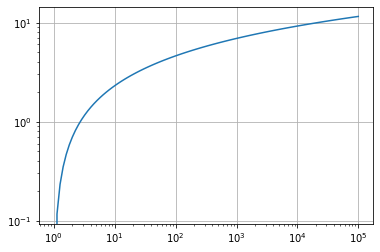

In [19]:
plt.plot(N,Y)
plt.xscale("log")
plt.yscale("log")
plt.grid()